# Context: 
Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

# Import necessary libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style= 'darkgrid')
from sklearn.model_selection import train_test_split

# Import data

In [26]:
columns = ['age', 'workclass', 'final_weight', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
           'race', 'sex','capital_gain', 'capital_loss','hours_per_week', 'native_country', 'target']

train = pd.read_table('adult.data', sep = ',',  names= columns)
test = pd.read_table('adult.test', sep = ',', header = 0, names = columns)

C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.
C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """


# Combine Train and test into one dataframe and perform necessary preprocessing

In [28]:
train.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
test.shape, train.shape

((16281, 15), (32561, 15))

In [30]:
df = pd.concat([train,test])
df.shape

(48842, 15)

In [31]:
df.tail()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [32]:
# because two dataframes with their indexes were concatenated, two rows can have same index value.
#So, we create a new index and drop the old one

df = df.reset_index().drop(columns= 'index') 

In [33]:
# instead of np.nan, turns out '?' the place holders for missing values

df.replace(to_replace= ' ?', value= np.nan, inplace= True)  

In [34]:
df.isna().sum()

age                  0
workclass         2799
final_weight         0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
target               0
dtype: int64

In [35]:
# We have quiet a large number of rows, although not ideal, so we will drop all the rows having missing values.
# We will learn some techniques to impute missing values later in the course
df2 = df.dropna()  
df2.shape

(45222, 15)

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null object
final_weight      45222 non-null int64
education         45222 non-null object
education_num     45222 non-null int64
marital_status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null object
target            45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [37]:
df2.age = df2.age.astype('int')

C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
# Convert categorical variables to "category" type

for i in df2.columns:
    if df2[i].dtype == 'O':
        df2[i] = df2[i].astype('category')
    else:
        pass

C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
# To check the number of classes in each categorical column

cat_col = df2.columns[pd.Series(df2.columns).apply(lambda x : df2[x].dtype.name == 'category')] 

for i in cat_col:
    print(i, "=>" ,len(df2[i].value_counts()))

workclass => 7
education => 16
marital_status => 7
occupation => 14
relationship => 6
race => 5
sex => 2
native_country => 41
target => 4


In [40]:
df.target.value_counts().index  # The target column turns out to be a little messy. Instead of 2 classes, we have 4

Index([' <=50K', ' <=50K.', ' >50K', ' >50K.'], dtype='object')

In [17]:
df2.target.replace( [' >50K.', ' <=50K.'], [' >50K', ' <=50K'], inplace = True) # tidy-up the target column

C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [18]:
#Label encoding all the categorical columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
encoded_df = pd.DataFrame()
for i in df2.columns:
    if i in cat_col:
        encoded_df[i] = le.fit_transform(df2[i])
    else:
        encoded_df[i] = df2[i]



# Pick out X(predictor(s)) and y(response)


In [19]:
X = encoded_df.drop(columns='target')
y = encoded_df.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

# Train and evaluate Models
### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
lr_score = logreg.score(X_test, y_test)
print(f"Score : {lr_score}")

Score : 0.7895807535821687


### Logistic Regression
#### with one hot encoding and column drops

In [23]:
df2.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [24]:
df2.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'target'],
      dtype='object')

In [25]:
one_hot = df2.drop(columns= ['education','final_weight'])

In [26]:
one_hot = pd.get_dummies(one_hot, drop_first= True)

In [27]:
one_hot.shape

(45222, 81)

In [28]:
X = one_hot.drop(columns= 'target_ >50K')
y = one_hot['target_ >50K']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [29]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

C:\Users\PRITHVIRAJ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
lr_score = logreg.score(X_test, y_test)
print(f"Score : {lr_score}")

Score : 0.8525561648682116


### KNN

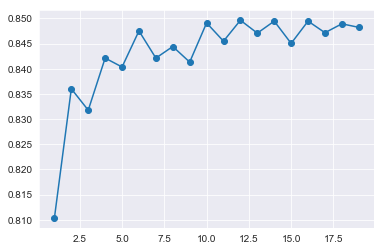

In [31]:
from sklearn.neighbors import KNeighborsClassifier

kscores = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    s = knn.score(X_test, y_test)
    kscores.append(s)
plt.plot(range(1,20), kscores, 'o-') 

In [32]:
knn = KNeighborsClassifier(n_neighbors = 18)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=18, p=2,
           weights='uniform')

In [33]:
knn_score = knn.score(X_test, y_test)
print(f"Score : {knn_score}")

Score : 0.8489297718025827


### Naive Bayes'

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(X_train, y_train)

In [35]:
nb_score = nb.score(X_test, y_test)
print(f"Score : {nb_score}")

Score : 0.8201839731116222


### Decision tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
dt_score = dt.score(X_test, y_test)
print(f"Score : {dt_score}")

Score : 0.8107199716964444


# Result

In [38]:
result = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive_bayes'", 'DecisionTree'], 
                       'Accuracy' : [lr_score, knn_score, nb_score, dt_score]})
result

,Model,Accuracy
0,Logistic Regression,0.852556
1,KNN,0.848930
2,Naive_bayes',0.820184
3,DecisionTree,0.810720


#### Logistic regression gave us the best accuracy of all. 
#### However is "accuracy" the only metric we need?
#### Let's use some other classification metrics in later exercises